In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense
from ipywidgets import interact_manual
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras import backend as K

In [10]:
#download data
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [11]:
if K.image_data_format() == 'channels_first':
    x_train_image = x_train_image.reshape(x_train_image.shape[0], 1, 28, 28)
    x_test_image = x_test_image.reshape(x_test_image.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train_image = x_train_image.reshape(x_train_image.shape[0], 28, 28, 1)
    x_test_image = x_test_image.reshape(x_test_image.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

In [17]:
x_Train = x_train_image.astype('float32') #reshape array形狀，從一排變成 60k row x 784 col
x_Test = x_test_image.astype('float32')

In [18]:
#正規化 255colour
x_Train_normalize = x_Train/255 
x_Test_normalize = x_Test/255

In [19]:
#答案變成binary顯示
y_Train_OneHot = np_utils.to_categorical(y_train_label) 
y_Test_OneHot = np_utils.to_categorical(y_test_label)
#把一個號碼，變成array中0~9的binary code形式

In [20]:
model = Sequential() #線性堆疊model
#1,2層：Convolution
model.add(Conv2D(filters=32, 
                 #filter數目不固定，大部分一個pixel會使用32個
                 #因為filter內數值隨機，越多filter越該準確度，
                 #下一層pooling也是用32個
                 #(3px*3px*3rgb+1bias)*32filter
                 kernel_size=(3,3), 
                 #convolution compute的特征值3x3
                input_shape=(28, 28, 1),
                activation='relu')) #激發函數 ->線性，因為是絕對的輸入值
#2,3層：              
model.add(Conv2D(64, (3, 3), activation='relu'))
#3,4層：Pooling 2x2的移動window
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten()) #multi-D 轉成 neural network需要的1D資料
model.add(Dense(128,activation='relu')) #neural network個數，激發函數：線性整流
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax')) #只有10個output，所以output neuron有10個

# print(model.summary())
#1: filter是3x3的，所以一次feed 9pixel，加上colour channel就9*3rgb=27neuron。加上bias，一次3x3用了28neuron。

In [22]:
#開始train model
model.compile(loss='categorical_crossentropy', #calculate predict和actual 的差距
              optimizer='adam', metrics=['accuracy']) #優化、評估模型的方法
train_history = model.fit(x=x_Train_normalize,
                          y=y_Train_OneHot, 
                          validation_split=0.2, #y is actual ans 其它是預設參數,
                          batch_size=128,
                            epochs=12,
                            verbose=1,
                            validation_data=(x_Test_normalize, y_Test_OneHot))
score = model.evaluate(x_Test_normalize, y_Test_OneHot, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0303 - val_accuracy: 0.9926
Epoch 2/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0184 - accuracy: 0.9937 - val_loss: 0.0334 - val_accuracy: 0.9916
Epoch 3/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0314 - val_accuracy: 0.9922
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.0316 - val_accuracy: 0.9922
Epoch 5/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0312 - val_accuracy: 0.9918
Epoch 6/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0271 - val_accuracy: 0.9927
Epoch 7/12
60000/60000 [==============================] - 4s 75us/st

In [23]:
print('Loss:', score[0])
print('準確率：', score[1]*100,'%')

Loss: 0.028949487208390582
準確率： 99.32000041007996 %


In [24]:
#幾乎predict對
prediction = model.predict_classes(x_Test_normalize)
print(prediction)
print(y_test_label)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [25]:
#找出錯誤前兩百筆
for i in range(0,200):
  if prediction[i] != y_test_label[i]:
    print(i, prediction[i], y_test_label[i])

In [26]:
#找出錯誤的資料
def showInfor(images, labels, prediction, idx):
  fig = plt.gcf() 
  fig.set_size_inches(12, 14) 
  num=25
  i=0
  while i < num:
    if labels[idx] != prediction[idx]:
      ax = plt.subplot(5,5, 1+i) # 小圖：size5x5、第1個，第2個，。。。按順序初始化第i圖
      ax.imshow(images[idx], cmap='binary') #第幾個圖
      title = "label=" + str(labels[idx]) #答案
      title += ",predict=" +str(prediction[idx]) #預測 
      ax. set_title(title,fontsize=10) 
      ax.set_xticks([]) #隱藏xy label
      ax.set_yticks([])
      i+=1
    idx+=1
  plt.show()
# showInfor(x_test_image, y_test_label, prediction, idx=0)

errorListCount={}
errorList={}
def showInfor2(labels, prediction):
  for i in range(len(labels)):
    if(labels[i],prediction[i]) in errorList.keys():
      errorListCount[(labels[i],prediction[i])] +=1
      errorList[(labels[i],prediction[i])].append(i)
    else:
      errorListCount[(labels[i],prediction[i])] =1
      errorList[(labels[i],prediction[i])] = [i]
showInfor2(y_test_label, prediction)
display(errorList[(3,8)])

[5955]

In [27]:
def plot_images_labels_prediction(images,labels,prediction,count): 
  fig = plt.gcf() 
  fig.set_size_inches(12, 14) 
  if count>25: count=25 
  idx=0
  if (labels, prediction) in errorList:
    for idx in range(0, count): 
      if len(errorList[(labels, prediction)]) <= idx:
        break
      ax = plt.subplot(5,5, 1+idx) # 小圖：size5x5、第1個，第2個，。。。按順序初始化第i圖
      ax.imshow(images[errorList[(labels,prediction)][idx]], cmap='binary') #第幾個圖
      title = "id=" + str(errorList[(labels,prediction)][idx]) #答案
      title += ",label=" + str(labels) #答案
      title += ",predict=" +str(prediction) #預測 
      ax. set_title(title,fontsize=10) 
      ax.set_xticks([]) #隱藏xy label
      ax.set_yticks([])
      idx+=1
  plt.show()

TypeError: ignored

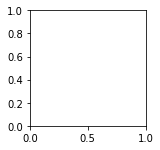

In [28]:
plot_images_labels_prediction(x_test_image, 3,8,10)

In [ ]:
def find(actual,prediction,count):
  plot_images_labels_prediction(x_test_image, actual,prediction,count)

interact_manual(find, actual=(0,9), prediction=(0,9), count=(1,25))

In [ ]:
#x_train_image[0]